In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [14]:
# Charger les données

from google.colab import files
import pandas as pd

# Téléverser un fichier manuellement
uploaded = files.upload()

# Lire le fichier (nom à ajuster selon ce qui est téléversé)
df = pd.read_csv("train_data_cleaned.csv")

# Afficher les premières lignes
df.head()

Saving train_data_cleaned.csv to train_data_cleaned.csv


,player1_avg_aces,player2_avg_aces,player1_avg_1stIn,player2_avg_1stIn,player1_avg_1stWon,player2_avg_1stWon,player1_avg_2ndWon,player2_avg_2ndWon,player1_ht,player2_ht,player1_age,player2_age,player1_rank,player2_rank,player1_rank_points,player2_rank_points,player1_ace,player2_ace,winner
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.536625,0.150373,0.764261,0.039594,-0.107921,-0.547856,-0.473606,1.511542,-0.407184,1.610551,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.549396,0.422540,-1.095336,-1.144009,0.249402,-0.100891,-0.576435,-0.479093,0.689979,-0.782369,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.258489,-0.257878,-0.856926,0.299986,-0.264642,-0.037938,-0.342732,-0.490558,-0.224323,-0.414227,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.158715,-0.530045,-1.190700,0.347330,1.195995,-0.415655,-0.705751,-0.129951,1.055700,-0.782369,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.536625,1.239041,-1.357587,-0.694240,0.982855,-0.466017,-0.691210,0.075887,-0.041463,-0.598298,0


In [15]:
df.columns

Index(['player1_avg_aces', 'player2_avg_aces', 'player1_avg_1stIn',
       'player2_avg_1stIn', 'player1_avg_1stWon', 'player2_avg_1stWon',
       'player1_avg_2ndWon', 'player2_avg_2ndWon', 'player1_ht', 'player2_ht',
       'player1_age', 'player2_age', 'player1_rank', 'player2_rank',
       'player1_rank_points', 'player2_rank_points', 'player1_ace',
       'player2_ace', 'winner'],
      dtype='object')

In [16]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

Valeurs manquantes par colonne :
 player1_avg_aces       0
player2_avg_aces       0
player1_avg_1stIn      0
player2_avg_1stIn      0
player1_avg_1stWon     0
player2_avg_1stWon     0
player1_avg_2ndWon     0
player2_avg_2ndWon     0
player1_ht             0
player2_ht             0
player1_age            0
player2_age            0
player1_rank           0
player2_rank           0
player1_rank_points    0
player2_rank_points    0
player1_ace            0
player2_ace            0
winner                 0
dtype: int64


In [17]:
df['player1_avg_1stIn'].unique()

array([ 0.        , 30.        , 51.        , ..., 66.83333333,
       30.57142857, 31.625     ])

In [ ]:
df['player1_avg_1stWon'].unique()

array([0.])

In [ ]:
df['player1_avg_2ndWon'].unique()

array([0.])

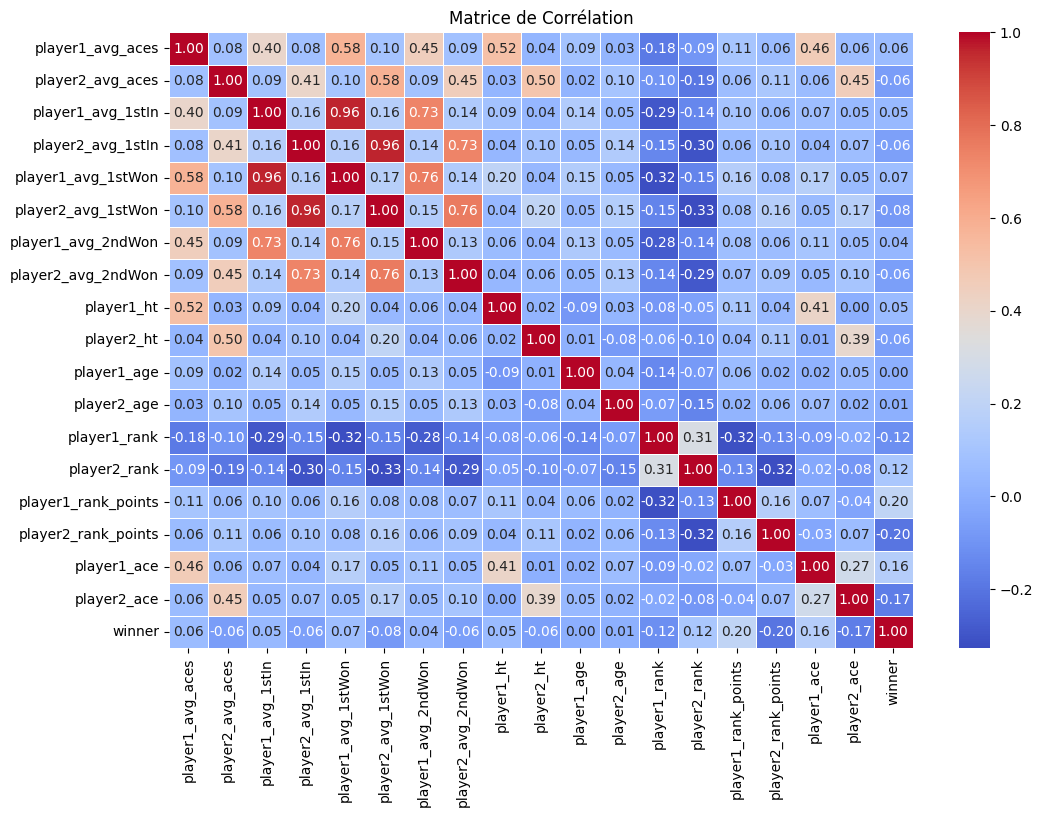

In [19]:
# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Affichage de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()


In [20]:
# Trier les corrélations avec `winner` en ordre décroissant
corr_with_player_1 = corr_matrix["player1_ace"].abs().sort_values(ascending=False)
print(corr_with_player_1)


player1_ace            1.000000
player1_avg_aces       0.463153
player1_ht             0.409296
player2_ace            0.271729
player1_avg_1stWon     0.169536
winner                 0.159483
player1_avg_2ndWon     0.108030
player1_rank           0.087819
player1_avg_1stIn      0.070838
player1_rank_points    0.070387
player2_age            0.066403
player2_avg_aces       0.059585
player2_avg_1stWon     0.052027
player2_avg_2ndWon     0.049558
player2_avg_1stIn      0.041105
player2_rank_points    0.028944
player2_rank           0.022239
player1_age            0.018760
player2_ht             0.006856
Name: player1_ace, dtype: float64


In [21]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

df.fillna(df.median(), inplace=True)

# 🔹 Sélection des variables d'entrée (on exclut celles qui ont des NaN)
features = ["player1_avg_aces","player1_avg_1stWon","player1_ht", "player2_ace",
            "player1_avg_2ndWon", "player1_avg_1stIn", "player1_rank"
          ]

X = df[features]
y = df["player1_ace"]

# Normalisation des données (obligatoire pour Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation en jeu d'entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔹 Entraînement du modèle Lasso avec validation croisée
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# 🔹 Affichage des coefficients
lasso_coeffs = pd.Series(lasso.coef_, index=features)
print("Coefficients Lasso:")
print(lasso_coeffs)

# 🔹 Sélection des variables non nulles (les plus pertinentes)
selected_features = lasso_coeffs[lasso_coeffs != 0].index.tolist()
print("\nVariables sélectionnées:", selected_features)


Coefficients Lasso:
player1_avg_aces      0.371407
player1_avg_1stWon    0.000000
player1_ht            0.207180
player2_ace           0.248492
player1_avg_2ndWon   -0.016291
player1_avg_1stIn    -0.106690
player1_rank         -0.027124
dtype: float64

Variables sélectionnées: ['player1_avg_aces', 'player1_ht', 'player2_ace', 'player1_avg_2ndWon', 'player1_avg_1stIn', 'player1_rank']


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Utiliser seulement les variables sélectionnées par Lasso
X_selected = df[selected_features]
X_selected_scaled = scaler.fit_transform(X_selected)  # Normalisation

# Séparation en jeu d'entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X_selected_scaled, y, test_size=0.2, random_state=42)

# 🔹 Entraînement du modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 🔹 Prédictions et évaluation
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📌 MSE: {mse:.4f}")
print(f"📌 R²: {r2:.4f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


📌 MSE: 0.6686
📌 R²: 0.2893
MAE: 0.589
RMSE: 0.818


In [27]:
# Création du DataFrame avec les nouvelles valeurs
new_match = pd.DataFrame({
    "player1_avg_aces":[18],
    "player1_avg_1stWon" :[49],
    "player1_ht":[188],
    "player2_ace":[10],
    "player1_avg_2ndWon":[21],
    "player1_avg_1stIn":[67],
    "player1_rank":[70]
})

# Ensure new_match only contains selected features before scaling
new_match_selected = new_match[selected_features]


# Normalisation des nouvelles données avec le scaler déjà ajusté sur les données d'entraînement
# Use the scaler fitted on the selected features
new_match_scaled = scaler.transform(new_match_selected)

# Prédiction du nombre d'aces pour Player 1
predicted_aces = rf_model.predict(new_match_scaled)

# Affichage de la prédiction
print(f"Nombre d'aces prédit pour Player 1 : {predicted_aces[0]:.2f}")

Nombre d'aces prédit pour Player 1 : 5.27


In [26]:
# Création du DataFrame avec les nouvelles valeurs
new_match = pd.DataFrame({
    "player1_avg_aces":[12],
    "player1_avg_1stWon" :[23],
    "player1_ht":[188],
    "player2_ace":[2],
    "player1_avg_2ndWon":[13],
    "player1_avg_1stIn":[26],
    "player1_rank":[70]
})

# Ensure new_match only contains selected features before scaling
new_match_selected = new_match[selected_features]


# Normalisation des nouvelles données avec le scaler déjà ajusté sur les données d'entraînement
# Use the scaler fitted on the selected features
new_match_scaled = scaler.transform(new_match_selected)

# Prédiction du nombre d'aces pour Player 1
predicted_aces = rf_model.predict(new_match_scaled)

# Affichage de la prédiction
print(f"Nombre d'aces prédit pour Player 1 : {predicted_aces[0]:.2f}")

Nombre d'aces prédit pour Player 1 : 2.88


# Autre test de ML à plusieurs variables

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

df.fillna(df.median(), inplace=True)

# 🔹 Sélection des variables d'entrée (on exclut celles qui ont des NaN)
features = ["player1_ht", "player2_age", "player2_rank_points",
            "player1_rank_points", "best_of", "player1_age", "player1_rank",
            "player2_ht", "player2_rank", "surface_Grass", "surface_Hard"]

# Définition de X (features) et y (cibles)
X = df[features]
y = df[["player1_avg_aces", "player2_avg_aces"]]  # Deux sorties

# Normalisation des données (important pour les NN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Construction du modèle MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Couche cachée avec 64 neurones
    Dense(32, activation='relu'),  # Deuxième couche cachée
    Dense(2)  # Deux sorties (player1_avg_aces et player2_avg_aces)
])

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Évaluation du modèle
loss, mae = model.evaluate(X_test, y_test)
print(f"📊 Performance du modèle - MAE: {mae:.3f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 36.8296 - mae: 4.8363 - val_loss: 18.8714 - val_mae: 3.2272
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.9346 - mae: 3.0750 - val_loss: 15.2288 - val_mae: 2.8889
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.6762 - mae: 2.9379 - val_loss: 14.8898 - val_mae: 2.8377
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.6822 - mae: 2.8775 - val_loss: 14.8019 - val_mae: 2.8246
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.9525 - mae: 2.8696 - val_loss: 14.7456 - val_mae: 2.8145
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.6792 - mae: 2.8547 - val_loss: 14.7633 - val_mae: 2.8201
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.0126 - mae: 2.7701 - val_loss: 14.6789 - val_mae: 2.8058
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.6631 - mae: 2.7719 - val_loss: 14.6222 - val_mae: 2.7912
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.6161 -

PermutationExplainer explainer: 599it [01:37,  5.42it/s]


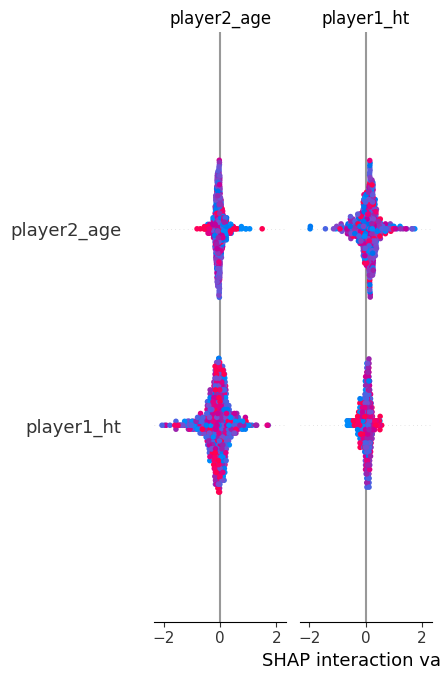

In [ ]:
import shap

# Calcul de l'importance des variables avec SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Affichage de l'importance des variables
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prédictions sur le test set
y_pred = model.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📊 MAE: {mae:.3f}")
print(f"📊 RMSE: {rmse:.3f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
📊 MAE: 2.876
📊 RMSE: 3.886


In [ ]:
import numpy as np
import pandas as pd

def predict_aces(model, scaler, surface_Grass, surface_Hard, best_of, player1_ht, player2_ht, player1_age, player2_age,
                 player1_rank, player2_rank, player1_rank_points, player2_rank_points,
                 # Add missing features with default values
                 ):

    # Créer un DataFrame pour structurer l'entrée
    # Include all features used during training
    input_data = pd.DataFrame({
        "player1_ht": [player1_ht],
        "player2_age": [player2_age],
        "player2_rank_points": [player2_rank_points],
        "player1_rank_points": [player1_rank_points],
        "best_of": [best_of],
        "player1_age": [player1_age],
        "player1_rank": [player1_rank],
        "player2_ht": [player2_ht],
        "player2_rank": [player2_rank],
        "surface_Grass": [surface_Grass],
        "surface_Hard" : [surface_Hard],
    })

    # Appliquer la transformation du scaler pour normaliser les valeurs
    input_scaled = scaler.transform(input_data)
    print("🚀 Input avant transformation :", input_data)
    print("📊 Input après scaler :", input_scaled)


    # Faire la prédiction avec le modèle
    prediction = model.predict(input_scaled)

    # Extraire les résultats
    player1_pred_aces = prediction[0][0]
    player2_pred_aces = prediction[0][1]

    print(f"🎾 Prédiction :")
    print(f"➡️ Player 1 Aces: {player1_pred_aces:.2f}")
    print(f"➡️ Player 2 Aces: {player2_pred_aces:.2f}")

    return player1_pred_aces, player2_pred_aces


# 🎯 **EXEMPLE D'UTILISATION :**
# Provide values for the missing features in the example usage
player1_pred, player2_pred = predict_aces(
    model=model,
    scaler=scaler,
    surface_Grass=0, surface_Hard=1, best_of=3,
    player1_ht=188, player2_ht=170,
    player1_age=29, player2_age=24,
    player1_rank=74, player2_rank=34,
    player1_rank_points=813, player2_rank_points=1425,
)


🚀 Input avant transformation :    player1_ht  player2_age  player2_rank_points  player1_rank_points  best_of  \
0         188           24                 1425                  813        3   

   player1_age  player1_rank  player2_ht  player2_rank  surface_Grass  \
0           29            74         170            34              0   

   surface_Hard  
0             1  
📊 Input après scaler : [[ 1.88843538e+02  2.40080194e+01  1.43126422e+03  8.15749562e+02
  -4.60806545e-01  2.90000000e+01  7.42723096e+01  1.70575534e+02
   3.41648093e+01 -3.51284861e-01  8.67379627e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
🎾 Prédiction :
➡️ Player 1 Aces: 910.52
➡️ Player 2 Aces: 451.44
